In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':'14'})
matplotlib.rc('text', usetex=False)

import os
sys.path.append('C:\\Users\\earcd\\Documents\\GitHub\\ISSI\meeting_solutions\\useful_scripts\\')

import cd_functions as f 

# Read the example file and print keys for reference

In [14]:
stem   = "output"
file   = stem+".pik"

if os.path.exists(file):
    with open(file,'rb') as open_file:
        data = pickle.load(open_file)
else: 
    print("Failed soln at ", name)
        
print(data['parameters'].keys())
print(data['core'].keys())

dict_keys(['save_time', 'Cm_mgo', 'Ej_fixed', 'Ej_fixed_pre_ic', 'Ej_lower_bound', 'G', 'Na', 'P_cmb', 'Rg', 'T_cmb', 'Tcen', 'alpha_c', 'alpha_c_mgo', 'conc_l', 'core', 'core_adiabat_params', 'core_alpha_T_params', 'core_conductivity_params', 'core_cp_params', 'core_dTa_dt', 'core_h0', 'core_latent_heat', 'core_liquid_density_params', 'core_melting_params', 'core_method_name', 'core_solid_density_params', 'diffusivity_c', 'dmu', 'entropy_melting_params', 'ev', 'half_life', 'include_baro_diffusion', 'iron_snow', 'kb', 'lambda_liq', 'lambda_sol', 'mantle', 'mantle_method_name', 'mf_l', 'mm', 'n_profiles', 'partition_coeff', 'precip_temp', 'r_cmb', 'ri', 'set_cooling_rate', 'sl_method_name', 'stable_layer', 'use_new_Cr', 'use_partition_coeff', 'ys'])
dict_keys(['ri', 'rs', 'r_snow', 'T_cmb', 'conc_l', 'mf_l', 'M0', 'dM', 'initial_conc_l', 'Tcen', 'conc_s', 'dTm', 'c_cmb', 'T_upper', 'time', 'it', 'Q_cmb', 'Q_rs', 'alpha_D', 'o_rho_0', 'Qa', 'Qa_rs', 'ADR', 'ADR_s', 'Ql', 'El', 'Qg', 'Eg'

# Plot heat flow and entropy time series and save to file

In [8]:
f.plot_single_ts(data, stem, 'r_snow') # All runs on same plot
f.plot_single_ts(data, stem, 'Ej'    )
f.plot_Q(data,1, stem)
f.plot_E(data,1, stem)

# FeS layer radius and bulk S conc as functions of time

Text(0, 0.5, 'Bulk S conc [wt\\%]')

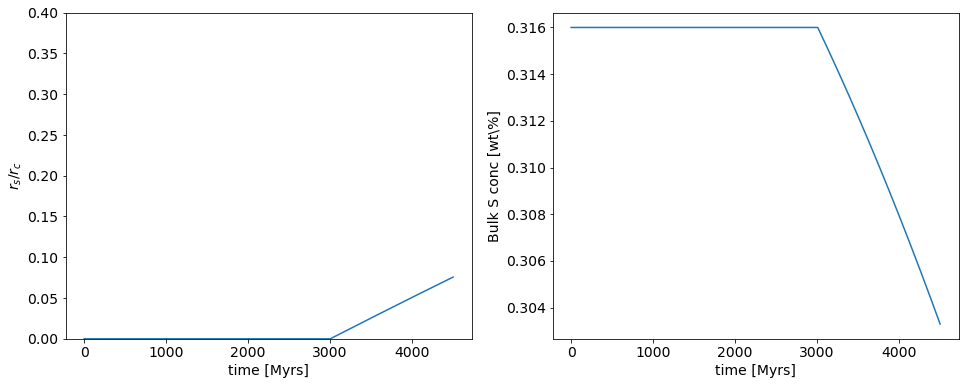

In [9]:
time = data['core']['time'] / (1e6*data['parameters']['ys'])  #Convert time from seconds to Myrs.
rs   = data['core']['r_snow']  
rc   = data['parameters']['r_cmb']  

cl   = data['core']['conc_l']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

ax1.plot(time, 1 - (rs/rc))  
ax1.set_xlabel('time [Myrs]')
ax1.set_ylabel('$r_s / r_c$')
ax1.set_ylim([0,0.4])

ax2.plot(time, cl)  
ax2.set_xlabel('time [Myrs]')
ax2.set_ylabel('Bulk S conc [wt\%]')
#ax2.ylim([0,0.4])

# Temperature evolution

Note that the CMB temperature is not updated as all equations are expressed in terms of central temoperature, $T_{cen}$. 

Text(0, 0.5, '$T_{cen}$ [km]')

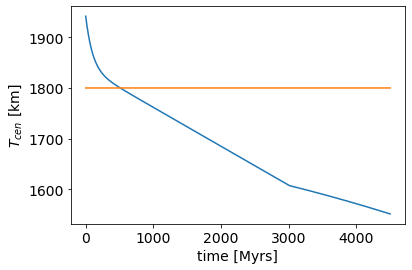

In [10]:
time = data['core']['time'] / (1e6*data['parameters']['ys'])  #Convert time from seconds to Myrs.
Tc   = data['core']['T_cmb']                                  # For some reason this is not being updated, I think its done in stable layer but not leeds_thermal

Tcen = data['core']['Tcen']

dt      = 1e6*data['parameters']['ys']
Tc_init = data['parameters']['T_cmb']
dTdt    = data['core']['dT_dt']

# for i, dT in enumerate(dTdt):
    
#     if i == 0:
#         Tc[i] = Tc_init
#     else:
#         Tc[i] = Tc[i-1] + (dT * Tc[i-1]/Tcen[i-1] * dt)

plt.plot(time, Tcen)
plt.plot(time, Tc)
plt.xlabel('time [Myrs]')
plt.ylabel('$T_{cen}$ [km]')
#plt.ylim([0,0.4])

# Ohmic Dissipation to compare to Tina's Fig 8

Text(0, 0.5, '$\\Psi$ (GW)')

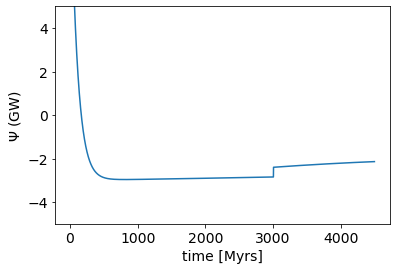

In [11]:
Ej = data['core']['Ej'] 
Tc = data['core']['T_cmb']  

plt.plot(time, Ej*Tc/1e9)
plt.ylim([-5,5])
plt.xlabel('time [Myrs]')
plt.ylabel('$\Psi$ (GW)')

# Zoom in on Power time-series to show jump in latent heat

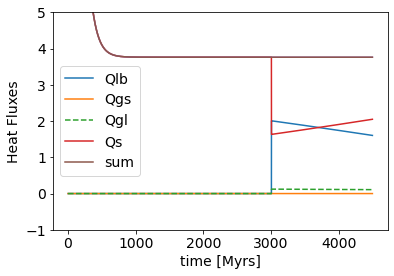

In [12]:
time = data['core']['time'] / (1e6*data['parameters']['ys'])  #Convert time from seconds to Myrs.
Qls  = data['core']['Ql_s']/1e10 # Zero
Qll  = data['core']['Ql_l']/1e10 # Zero
Qlb  = data['core']['Ql_b']/1e10
Qgb  = data['core']['Qg_b']/1e10 # Zero
Qgs  = data['core']['Qg_s']/1e10
Qgl  = data['core']['Qg_l']/1e10   
Qs   = data['core']['Qs']/1e10   
Qcmb   = data['core']['Q_cmb']/1e10   

plt.plot(time, Qlb, label="Qlb") 
plt.plot(time, Qgs, label="Qgs") 
plt.plot(time, Qgl, label="Qgl", linestyle='--') 
plt.plot(time, Qs , label="Qs") 
plt.plot(time, Qcmb)
plt.plot(time, Qls+Qll+Qgs+Qgl+Qs+Qlb, label="sum")


plt.xlabel('time [Myrs]')
plt.ylabel('Heat Fluxes')
plt.ylim([-1,5])
plt.legend()

# Final intersection between Tm and Ta

[-3.49548361e-14 -3.46312952e-14 -3.43109736e-14 ... -1.32826128e-15
 -1.32844889e-15 -1.32863651e-15]
[   0.            0.            0.         ... 1179.94637775 1179.72414318
 1179.50194235]
[999000. 999000. 999000. ... 999000. 999000. 999000.]


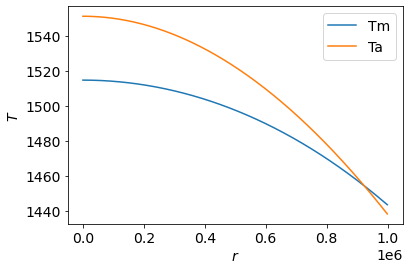

In [18]:
r  = data['core']['profiles']['r']
Ta = data['core']['profiles']['Ta']
Tm = data['core']['profiles']['Tm']

plt.plot(r, Tm, label="Tm")
plt.plot(r, Ta, label="Ta")
plt.legend()
plt.xlabel("$r$")
plt.ylabel("$T$")

print(data['core']['dT_dt'])
print(data['core']['Cr'])
print(data['core']['rs'])